<a href="https://colab.research.google.com/github/singh06-08/Advanced-ML/blob/main/Integrated_Retail_Analytics_for_Store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

## Integrated Retail Analytics for Store Optimization and Demand Forecasting

# **Team Members**

**Member 1** -Sharvalik Singh(Individual)

# **Problem Statement**

To utilize machine learning and data analysis techniques to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies.

# ***Let's Begin !***

# **Import Libraries**

In [ ]:
!pip install numpy pandas matplotlib scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Loading**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/sales data-set.csv')

In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


# **Anomaly Detection in Sales Data:**

Identify unusual sales patterns across stores and departments.
Investigate potential causes (e.g., holidays, markdowns, economic indicators).
Implement anomaly handling strategies to clean the data for further analysis.

In [ ]:
features = ['Weekly_Sales', 'Date', 'IsHoliday']
X = df[features]

In [ ]:
# Convert 'IsHoliday' to numerical (if it's boolean)
X['IsHoliday'] = X['IsHoliday'].astype(int)

# Drop the 'Date' column as it's not suitable for scaling
features = ['Weekly_Sales', 'IsHoliday']
X = df[features]

# Now apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-9-bd94c3b421f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IsHoliday'] = X['IsHoliday'].astype(int)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination as needed
model.fit(X_scaled)

# Predict anomalies
df['anomaly'] = model.predict(X_scaled)

# Convert -1 (anomaly) and 1 (normal) to boolean values
df['anomaly'] = df['anomaly'] == -1

# View the results
print(df[df['anomaly']])


        Store  Dept       Date  Weekly_Sales  IsHoliday  anomaly
1           1     1 2010-02-12      46039.49       True     True
31          1     1 2010-09-10      18194.74       True     True
42          1     1 2010-11-26      18820.29       True     True
47          1     1 2010-12-31      19124.58       True     True
53          1     1 2011-02-11      37887.17       True     True
...       ...   ...        ...           ...        ...      ...
421230     45    95 2011-09-09      55286.01       True     True
421241     45    95 2011-11-25      48012.46       True     True
421246     45    95 2011-12-30      42084.36       True     True
421252     45    95 2012-02-10      53291.16       True     True
421282     45    95 2012-09-07      52417.47       True     True

[21028 rows x 6 columns]


In [ ]:
import seaborn as sns

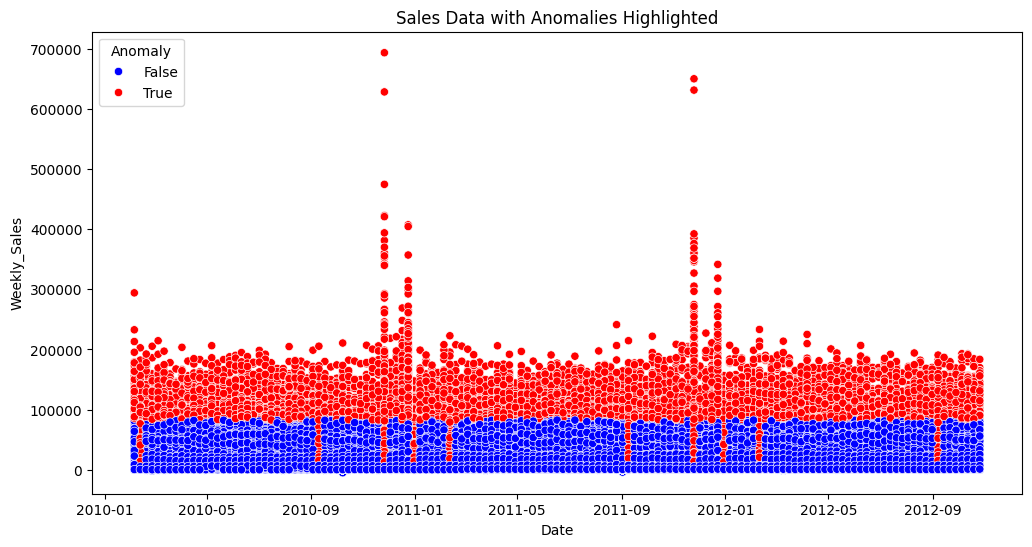

In [ ]:
plt.figure(figsize=(12, 6))

# Plot sales data with anomalies highlighted
sns.scatterplot(data=df, x='Date', y='Weekly_Sales', hue='anomaly', palette={True: 'red', False: 'blue'})

plt.title('Sales Data with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.legend(title='Anomaly', loc='upper left')
plt.show()


In [ ]:


# Aggregating data by store and department
aggregated_df = df.groupby(['Store'])['Dept'].sum().reset_index()

# Check the aggregated data
aggregated_df.head()


,Store,Dept
0,1,454749
1,2,455425
2,3,370825
3,4,457340
4,5,371526


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Normalize the sales data
scaler = StandardScaler()
features = [ 'Store', 'Dept']
X = aggregated_df[features]
X_scaled = scaler.fit_transform(X)

# Optional: Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed
model.fit(X_pca)

# Predict anomalies
aggregated_df['anomaly'] = model.predict(X_pca)
aggregated_df['anomaly'] = aggregated_df['anomaly'] == -1  # Convert -1 to True for anomalies

# View the anomalies
print(aggregated_df[aggregated_df['anomaly']])


    Store    Dept  anomaly
2       3  370825     True
8       9  355292     True
35     36  293473     True


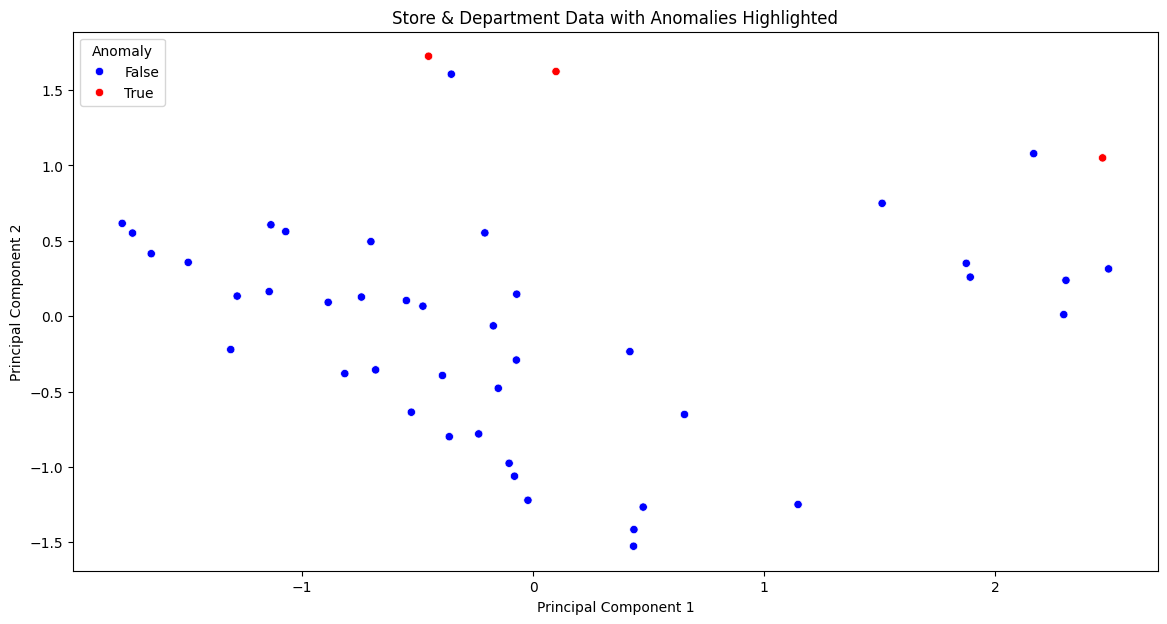

In [ ]:
# Plot sales data with anomalies highlighted
plt.figure(figsize=(14, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=aggregated_df['anomaly'], palette={True: 'red', False: 'blue'})
plt.title('Store & Department Data with Anomalies Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly', loc='upper left')
plt.show()


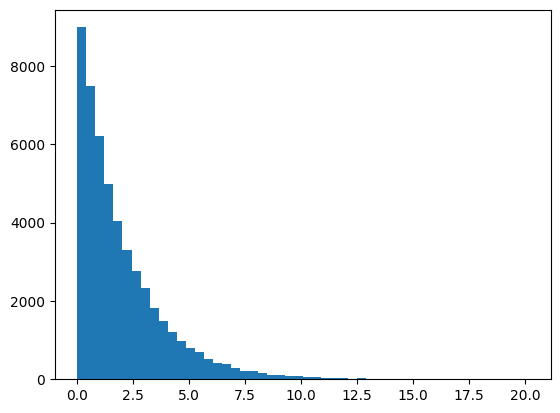

In [ ]:
import numpy as np

# Generate 1000 samples from a right-skewed distribution
df = np.random.exponential(scale=2,size=50000)

# Plot the data to visualize the skew
import matplotlib.pyplot as plt
plt.hist(df, bins=50)
plt.show()

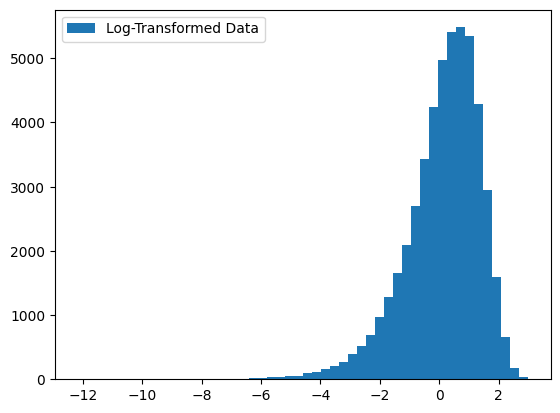

In [ ]:
# Apply log transformation to the data
log_data = np.log(df)

# Plot the original data and the log-transformed data
import matplotlib.pyplot as plt
#plt.hist(data, bins=50, label='Original Data')
plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

In [ ]:
df = np.random.beta(a=1, b=5, size=50000)


In [ ]:
data_log = np.sqrt(df)

Text(0.5, 1.0, 'Original Data')

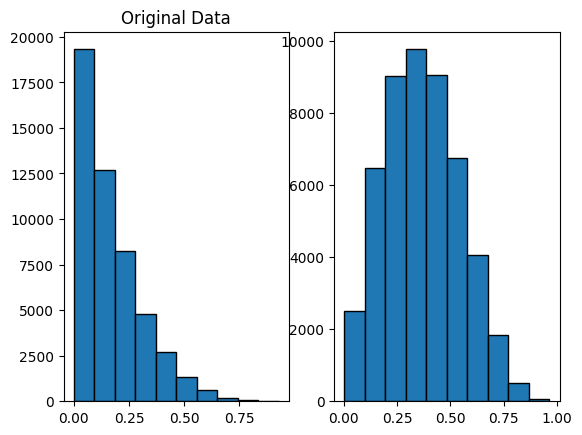

In [ ]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')

# **Time-Based Anomaly Detection**

Analyze sales trends over time.
Detect seasonal variations and holiday effects on sales.
Use time-series analysis for understanding store and department performance over time.

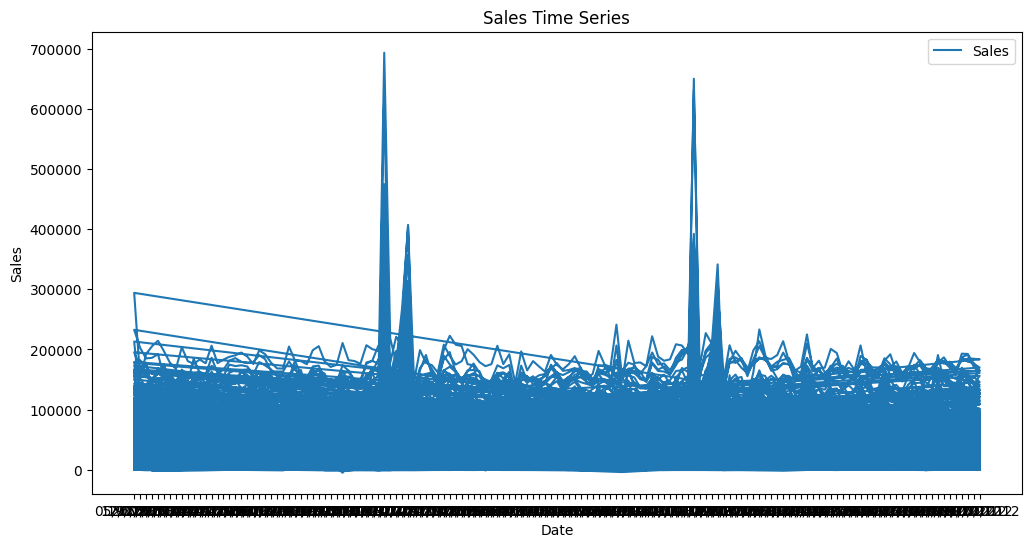

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sales data (assuming the file path is correct)
df = pd.read_csv('/content/drive/MyDrive/sales data-set.csv', parse_dates=['Date'], index_col='Date')

# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Sales') # Use the 'index' attribute on the DataFrame 'df'
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Calculate mean and standard deviation
mean = np.mean(df['Weekly_Sales'])
std_dev = np.std(df['Weekly_Sales'])

# Calculate Z-scores
df['z_score'] = (df['Weekly_Sales'] - mean) / std_dev

# Set a threshold for anomalies
threshold = 2
df['anomaly'] = df['z_score'].abs() > threshold

# Filter anomalies
anomalies = df[df['anomaly']]

print("Anomalies:\n", anomalies)


Anomalies:
             Store  Dept  Weekly_Sales  IsHoliday   z_score  anomaly
Date                                                               
23/12/2011      1     2      65615.36      False  2.185450     True
26/11/2010      1     5      70158.86       True  2.385506     True
24/12/2010      1     5      85676.09      False  3.068749     True
25/11/2011      1     5      79340.15       True  2.789769     True
23/12/2011      1     5      61483.82      False  2.003533     True
...           ...   ...           ...        ...       ...      ...
17/06/2011     45    95      62478.05      False  2.047311     True
08/07/2011     45    95      61987.62      False  2.025716     True
22/07/2011     45    95      62049.70      False  2.028450     True
26/08/2011     45    95      75204.77      False  2.607684     True
06/07/2012     45    95      62606.75      False  2.052977     True

[20913 rows x 6 columns]


In [ ]:
from sklearn.ensemble import IsolationForest

# Prepare data
data = df['Weekly_Sales'].values.reshape(-1, 1)

# Create and fit the model
model = IsolationForest(contamination=0.01)  # Adjust contamination as needed
model.fit(data)

# Predict anomalies
df['anomaly'] = model.predict(data)
df['anomaly'] = df['anomaly'] == -1

# Filter anomalies
anomalies = df[df['anomaly']]

print("Anomalies:\n", anomalies)


Anomalies:
             Store  Dept  Weekly_Sales  IsHoliday   z_score  anomaly
Date                                                               
24/12/2010      1     7     166697.72      False  6.636230     True
23/12/2011      1     7     119302.15      False  4.549345     True
05/02/2010      1    38     115564.35      False  4.384765     True
05/03/2010      1    38     108282.86      False  4.064152     True
30/04/2010      1    38     127811.89      False  4.924039     True
...           ...   ...           ...        ...       ...      ...
23/12/2011     45     7     138335.78      False  5.387419     True
26/11/2010     45    72     240758.86       True  9.897233     True
24/12/2010     45    72     136297.96      False  5.297692     True
25/11/2011     45    72     198041.11       True  8.016318     True
23/12/2011     45    72     116924.78      False  4.444667     True

[4199 rows x 6 columns]


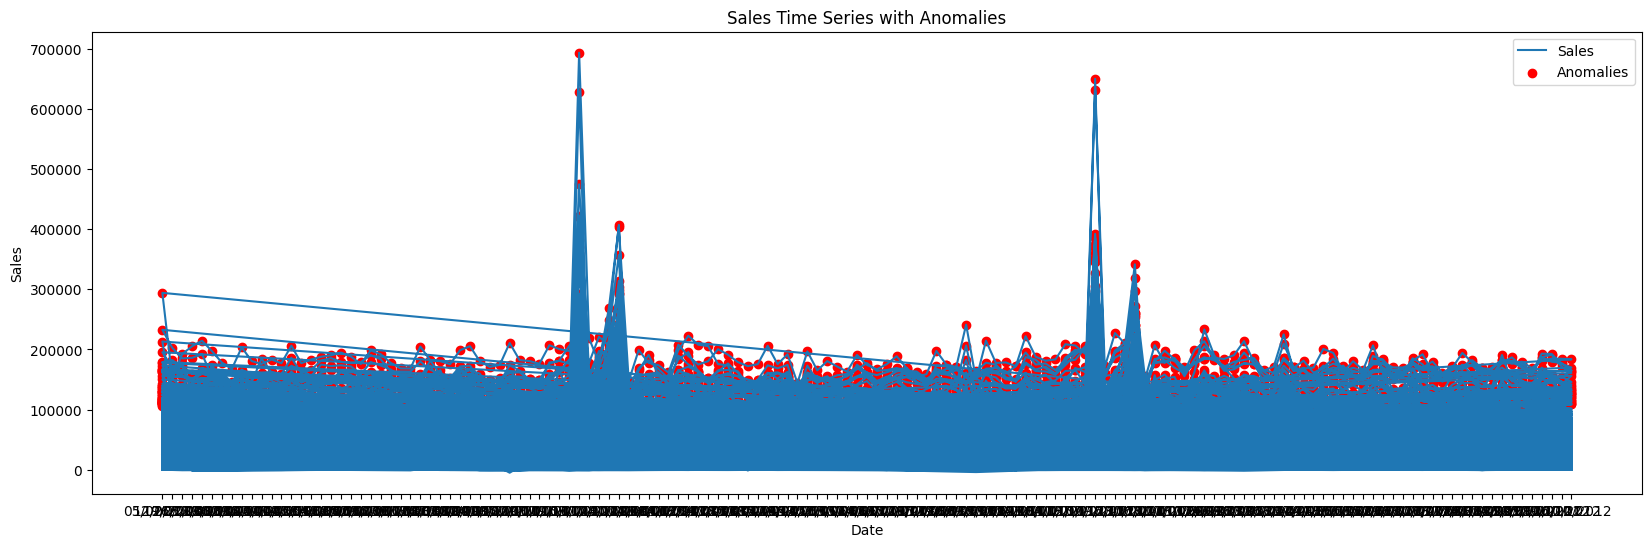

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Sales')
plt.scatter(anomalies.index, anomalies['Weekly_Sales'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series with Anomalies')
plt.legend()
plt.show()


analyze sales data overtime

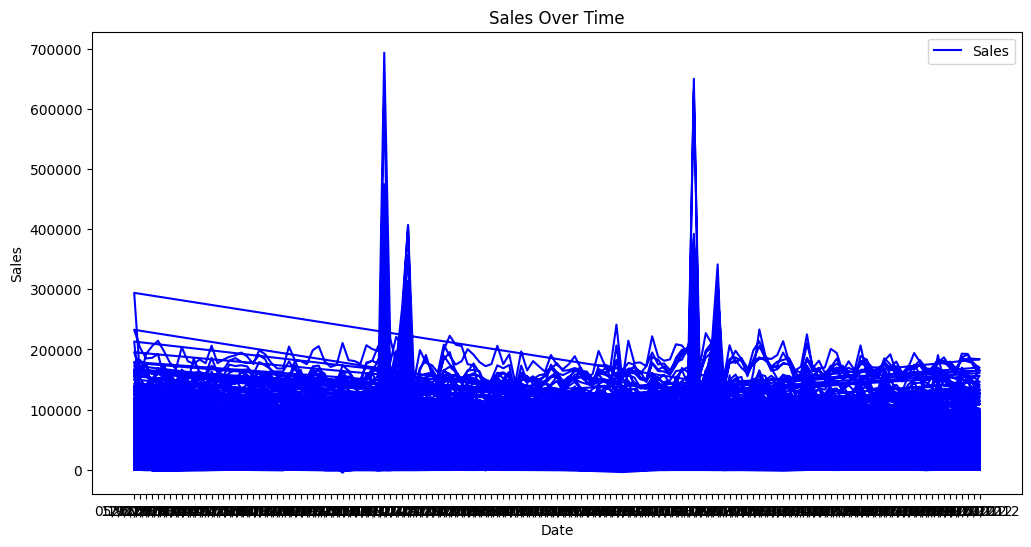

In [ ]:
import matplotlib.pyplot as plt

# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()


In [ ]:
Dept_max_sales= df.groupby('Dept')[['Weekly_Sales']].sum().sort_values('Weekly_Sales', ascending=False).index[0]
print('Dept with maximum sales:', Dept_max_sales)

Dept with maximum sales: 92


In [ ]:
x='Weekly_Sales'
y='IsHoliday'

In [ ]:
# Extract the first 500 rows
subset_data = df.head(100)

# Display the first few rows of the subset
print(subset_data.head())


            Store  Dept  Weekly_Sales  IsHoliday   z_score  anomaly
Date                                                               
05/02/2010      1     1      24924.50      False  0.393782    False
12/02/2010      1     1      46039.49       True  1.323501    False
19/02/2010      1     1      41595.55      False  1.127829    False
26/02/2010      1     1      19403.54      False  0.150687    False
05/03/2010      1     1      21827.90      False  0.257435    False


In [ ]:
df

,Store,Dept,Weekly_Sales,IsHoliday,z_score,anomaly
Date,,,,,,
05/02/2010,1,1,24924.50,False,0.393782,False
12/02/2010,1,1,46039.49,True,1.323501,False
19/02/2010,1,1,41595.55,False,1.127829,False
26/02/2010,1,1,19403.54,False,0.150687,False
05/03/2010,1,1,21827.90,False,0.257435,False
...,...,...,...,...,...,...
28/09/2012,45,98,508.37,False,-0.681290,False
05/10/2012,45,98,628.10,False,-0.676018,False
12/10/2012,45,98,1061.02,False,-0.656956,False


In [ ]:
sub_set1=df.head(50)

In [ ]:
sub_set1

,Store,Dept,Weekly_Sales,IsHoliday,z_score,anomaly
Date,,,,,,
05/02/2010,1,1,24924.50,False,0.393782,False
12/02/2010,1,1,46039.49,True,1.323501,False
19/02/2010,1,1,41595.55,False,1.127829,False
26/02/2010,1,1,19403.54,False,0.150687,False
05/03/2010,1,1,21827.90,False,0.257435,False
12/03/2010,1,1,21043.39,False,0.222892,False
19/03/2010,1,1,22136.64,False,0.271029,False
26/03/2010,1,1,26229.21,False,0.451230,False
02/04/2010,1,1,57258.43,False,1.817484,False


In [ ]:
onehot_code=pd.get_dummies(sub_set1, columns=['IsHoliday'])

In [ ]:
onehot_code

,Store,Dept,Weekly_Sales,z_score,anomaly,IsHoliday_False,IsHoliday_True
Date,,,,,,,
05/02/2010,1,1,24924.50,0.393782,False,True,False
12/02/2010,1,1,46039.49,1.323501,False,False,True
19/02/2010,1,1,41595.55,1.127829,False,True,False
26/02/2010,1,1,19403.54,0.150687,False,True,False
05/03/2010,1,1,21827.90,0.257435,False,True,False
12/03/2010,1,1,21043.39,0.222892,False,True,False
19/03/2010,1,1,22136.64,0.271029,False,True,False
26/03/2010,1,1,26229.21,0.451230,False,True,False
02/04/2010,1,1,57258.43,1.817484,False,True,False


In [ ]:
sub_set1['IsHoliday'] = sub_set1['IsHoliday'].astype(int)
print(sub_set1)

            Store  Dept  Weekly_Sales  IsHoliday   z_score  anomaly
Date                                                               
05/02/2010      1     1      24924.50          0  0.393782    False
12/02/2010      1     1      46039.49          1  1.323501    False
19/02/2010      1     1      41595.55          0  1.127829    False
26/02/2010      1     1      19403.54          0  0.150687    False
05/03/2010      1     1      21827.90          0  0.257435    False
12/03/2010      1     1      21043.39          0  0.222892    False
19/03/2010      1     1      22136.64          0  0.271029    False
26/03/2010      1     1      26229.21          0  0.451230    False
02/04/2010      1     1      57258.43          0  1.817484    False
09/04/2010      1     1      42960.91          0  1.187947    False
16/04/2010      1     1      17596.96          0  0.071141    False
23/04/2010      1     1      16145.35          0  0.007225    False
30/04/2010      1     1      16555.11          0

<ipython-input-37-9f9493aee1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_set1['IsHoliday'] = sub_set1['IsHoliday'].astype(int)


In [ ]:
sub_set1

,Store,Dept,Weekly_Sales,IsHoliday,z_score,anomaly
Date,,,,,,
05/02/2010,1,1,24924.50,0,0.393782,False
12/02/2010,1,1,46039.49,1,1.323501,False
19/02/2010,1,1,41595.55,0,1.127829,False
26/02/2010,1,1,19403.54,0,0.150687,False
05/03/2010,1,1,21827.90,0,0.257435,False
12/03/2010,1,1,21043.39,0,0.222892,False
19/03/2010,1,1,22136.64,0,0.271029,False
26/03/2010,1,1,26229.21,0,0.451230,False
02/04/2010,1,1,57258.43,0,1.817484,False


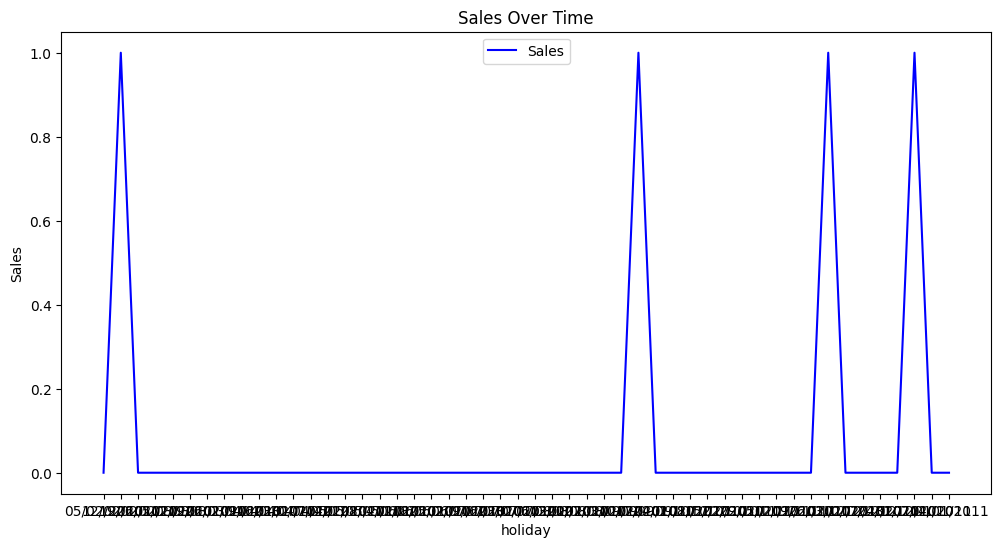

In [ ]:
import matplotlib.pyplot as plt

# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(sub_set1.index, sub_set1['IsHoliday'], label='Sales', color='blue')
plt.xlabel('holiday')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()


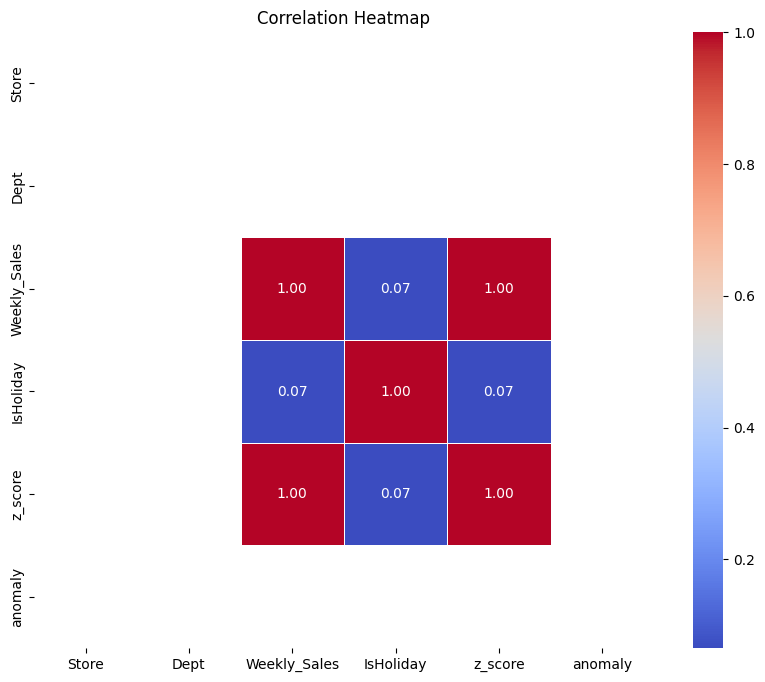

In [ ]:
corr = sub_set1.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
stores_df=pd.read_csv('/content/drive/MyDrive/stores data-set.csv')

In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# **Data Preprocessing and Feature Engineering**

Handle missing values, especially in the MarkDown data.
Create new features that could influence sales (e.g., store size/type, regional factors).

In [ ]:
features_df=pd.read_csv('/content/drive/MyDrive/Features data set.csv')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features_df.shape

(8190, 12)

In [ ]:
count_nan = features_df.isna().sum()

print ('Count of NaN: ' + str(count_nan))

Count of NaN: Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [ ]:
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y') # Tell pandas the correct format

In [ ]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
mean_value = features_df.mean()
features_df.fillna(mean_value, inplace=True)

In [ ]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106000,True
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106000,False
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106000,False
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,False
8186,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,False
8187,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,False
8188,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,False


## New feature

In [ ]:
features_df['deviation_from_mean_CPI'] = features_df['CPI'] - features_df['CPI'].mean()

#See how it affected our data using head
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,deviation_from_mean_CPI
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,38.635549
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True,38.781361
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,38.828334
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False,38.858834
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False,38.889334


# **Customer Segmentation Analysis**

Segment stores or departments based on sales patterns, markdowns, and regional features.
Analyze segment-specific trends and characteristics.

In [ ]:
#SALES AND STORE DATA COMBINED
sales_stores_df = pd.merge(df, stores_df, on='Store')
sales_stores_df

,Store,Dept,Weekly_Sales,IsHoliday,z_score,anomaly,Type,Size
0,1,1,24924.50,False,0.393782,False,A,151315
1,1,1,46039.49,True,1.323501,False,A,151315
2,1,1,41595.55,False,1.127829,False,A,151315
3,1,1,19403.54,False,0.150687,False,A,151315
4,1,1,21827.90,False,0.257435,False,A,151315
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,-0.681290,False,B,118221
421566,45,98,628.10,False,-0.676018,False,B,118221
421567,45,98,1061.02,False,-0.656956,False,B,118221
421568,45,98,760.01,False,-0.670210,False,B,118221


In [ ]:
subset_df=sales_stores_df.head(5000)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify non-numerical columns
non_numeric_cols = subset_df.select_dtypes(exclude=['number']).columns

# Apply Label Encoding to non-numerical columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    subset_df[col] = label_encoder.fit_transform(subset_df[col])

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

<ipython-input-53-45243ae17e66>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[col] = label_encoder.fit_transform(subset_df[col])
<ipython-input-53-45243ae17e66>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[col] = label_encoder.fit_transform(subset_df[col])
<ipython-input-53-45243ae17e66>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ... (Your previous code)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Convert scaled data back to a DataFrame for feature selection
scaled_df = pd.DataFrame(scaled_data, columns=subset_df.columns)

features = ['Weekly_Sales', 'Store', 'Dept']
X = scaled_df[features]  # Now you can index with column names

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

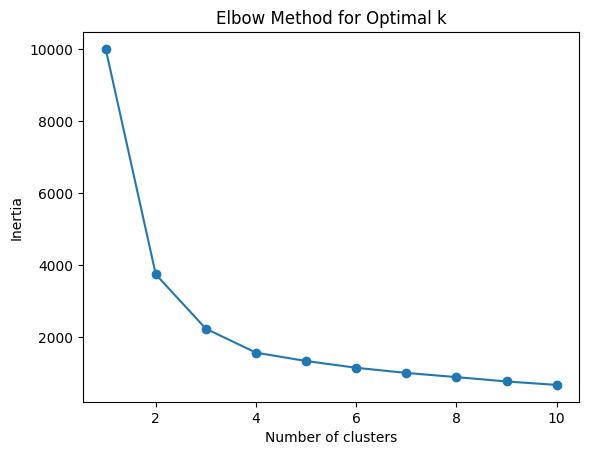

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-56-32b242d4f87f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Cluster'] = clusters


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (k) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters (for example, k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
subset_df['Cluster'] = clusters


         Store       Dept  Weekly_Sales  IsHoliday   z_score   anomaly  Type  \
Cluster                                                                        
0          1.0   8.157541  37592.503641   0.074928  0.951570  0.001921   0.0   
1          1.0  27.322581   5702.897528   0.068267 -0.452569  0.000000   0.0   
2          1.0   9.392111  13792.806234   0.070379 -0.096360  0.000000   0.0   

             Size  
Cluster            
0        151315.0  
1        151315.0  
2        151315.0  


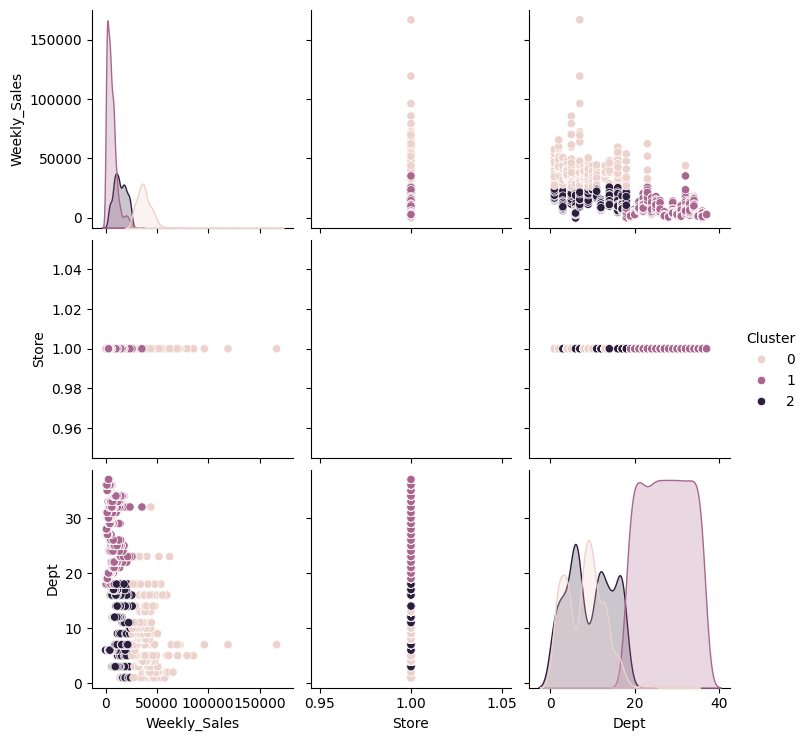

In [ ]:
# Group by cluster and calculate mean of each feature
cluster_summary = subset_df.groupby('Cluster').mean()

print(cluster_summary)

# Optionally, you can visualize the clusters
import seaborn as sns

sns.pairplot(subset_df, hue='Cluster', vars=features)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.5165777599767862


# **Market Basket Analysis**

Although individual customer transaction data is not available, infer potential product associations within departments using sales data.
Develop cross-selling strategies based on these inferences.

In [ ]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from apyori import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['IsHoliday']=df['IsHoliday'].apply(lambda x: 1 if x=='True' else 0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
relevant_stores = np.array(df['Store'].value_counts().index) # Example list of department numbers to analyze
sales_data_filtered = df[df['Store'].isin(relevant_stores)]
sales_data_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Store,Dept,Weekly_Sales,IsHoliday,z_score,anomaly
Date,,,,,,
05/02/2010,1,1,24924.50,0,0.393782,False
12/02/2010,1,1,46039.49,0,1.323501,False
19/02/2010,1,1,41595.55,0,1.127829,False
26/02/2010,1,1,19403.54,0,0.150687,False
05/03/2010,1,1,21827.90,0,0.257435,False


In [ ]:
# Step 2: Creating a DataFrame for Association Rule Mining
# Convert sales data into a transaction format
transactions = sales_data_filtered.groupby(['Date','Dept'])['Store'].apply(list).reset_index(name='Stores')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
l=[]
for i in range(0,11087):
    l.append([str(transactions.values[i,j]) for j in range(0,3)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#applying apriori algorithm
association_rules = apriori(l, min_support=0.011, min_confidence=0.8, min_lift=3, min_length=2)
association_results = list(association_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'29', '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]'})
frozenset({'[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]', '30'})
frozenset({'35', '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]'})
frozenset({'36', '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]'})
frozenset({'37', '[1, 2, 4, 6, 8, 10, 11, 13, 19, 20, 24, 25, 27, 28, 31, 32, 34, 40]'})
frozenset({'65', '[34]'})
frozenset({'[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]', '71'})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

Rule: 29 -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]
Support: 0.011364661315053667
Confidence: 0.8811188811188811
Lift: 8.37818613633365
-----------------------------------------------------
Rule: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45] -> 30
Support: 0.012897988635338685
Confidence: 1.0
Lift: 9.508576329331046
-----------------------------------------------------
Rule: 35 -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]
Support: 0.012356814287002795
Confidence: 0.958041958041958
Lift: 9.10961508474373
-----------------------------------------------------
Rule: 36 -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

import pandas as pd

# Create lists to hold the data for each association rule
rules = []
supports = []
confidences = []
lifts = []

# Iterate over the association_results and extract information
for item in association_results:
    rules.append(item[0])
    supports.append(item[1])
    confidences.append(item[2][0][2])
    lifts.append(item[2][0][3])

# Create a DataFrame to display the association results
association_df = pd.DataFrame({
    'Rule': rules,
    'Support': supports,
    'Confidence': confidences,
    'Lift': lifts
})

# Convert frozenset to tuple
association_df['Rule'] = association_df['Rule'].apply(lambda x: tuple(x))

# Splitting the Rule column into Antecedent and Consequent
association_df[['Antecedent', 'Consequent']] = pd.DataFrame(association_df['Rule'].tolist(), index=association_df.index)

# Drop the original Rule column
association_df.drop(columns=['Rule'], inplace=True)

# Reorder columns
association_df = association_df[['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
association_df.head().sort_values(by='Confidence',ascending=False).reset_index(drop=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Antecedent,Consequent,Support,Confidence,Lift
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",30,0.012898,1.000000,9.508576
1,37,"[1, 2, 4, 6, 8, 10, 11, 13, 19, 20, 24, 25, 27...",0.012627,0.979021,77.531469
2,35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.012357,0.958042,9.109615
3,36,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.012357,0.958042,9.109615
4,29,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.011365,0.881119,8.378186


The results tell us about the association rules that shows relationships between departments. Each rule specifies a set of items (antecedent) that are associated with another set of items (consequent). For example, a rule might indicate that when department 29 is present, items in stores 1, 2, 3, ..., 45 tend to be purchased together.

# **Demand forecasting**

Build models to forecast weekly sales for each store and department.
Incorporate factors like CPI, unemployment rate, fuel prices, and store/dept attributes.
Explore short-term and long-term forecasting models.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  # Import from the correct module

# Define the model
model = ARIMA(sub_set['Weekly_Sales'], order=(5, 1, 0))  # You might need to adjust the order

# Fit the model
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=10)  # Forecast next 10 weeks

# Print forecasted values
print(forecast.iloc[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


37486.83749774535


In [ ]:
#combine features_df and subset_df
df_1=pd.merge(features_df, subset_df, on=['Store','IsHoliday'])
df_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,deviation_from_mean_CPI,Dept,Weekly_Sales,z_score,anomaly,Type,Size,Cluster
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,38.635549,1,24924.50,0.393782,0,0,151315,2
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,38.635549,1,41595.55,1.127829,0,0,151315,0
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,38.635549,1,19403.54,0.150687,0,0,151315,2
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,38.635549,1,21827.90,0.257435,0,0,151315,2
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,38.635549,1,21043.39,0.222892,0,0,151315,2


In [ ]:
# Create lagged features
df_1['Sales_Lag1'] = df_1['Weekly_Sales'].shift(1)
df_1['Sales_Lag2'] = df_1['Weekly_Sales'].shift(2)

# Rolling mean of CPI and fuel prices
df_1['CPI_Rolling_Mean'] = df_1['CPI'].rolling(window=4).mean()
df_1['Fuel_Rolling_Mean'] = df_1['Fuel_Price'].rolling(window=4).mean()

# Drop rows with NaN values after creating lagged features
df_2 = df_1.dropna()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = df_2[['Sales_Lag1', 'Sales_Lag2', 'CPI', 'Fuel_Price', 'CPI_Rolling_Mean', 'Fuel_Rolling_Mean']]
y = df_2['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 151923899.82577845


In [ ]:
# Example of new data
new_data = pd.DataFrame({
    'Sales_Lag1': [500],  # Example lagged sales value
    'Sales_Lag2': [450],  # Example lagged sales value
    'CPI': [255.0],  # Example CPI value
    'Fuel_Price': [3.50],  # Example fuel price value
    'CPI_Rolling_Mean': [253.0],  # Example rolling mean
    'Fuel_Rolling_Mean': [3.45]  # Example rolling mean
})

# Forecast sales
forecast = model.predict(new_data)
print(f'Forecasted Sales: {forecast[0]}')


Forecasted Sales: 145432.58962896565


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


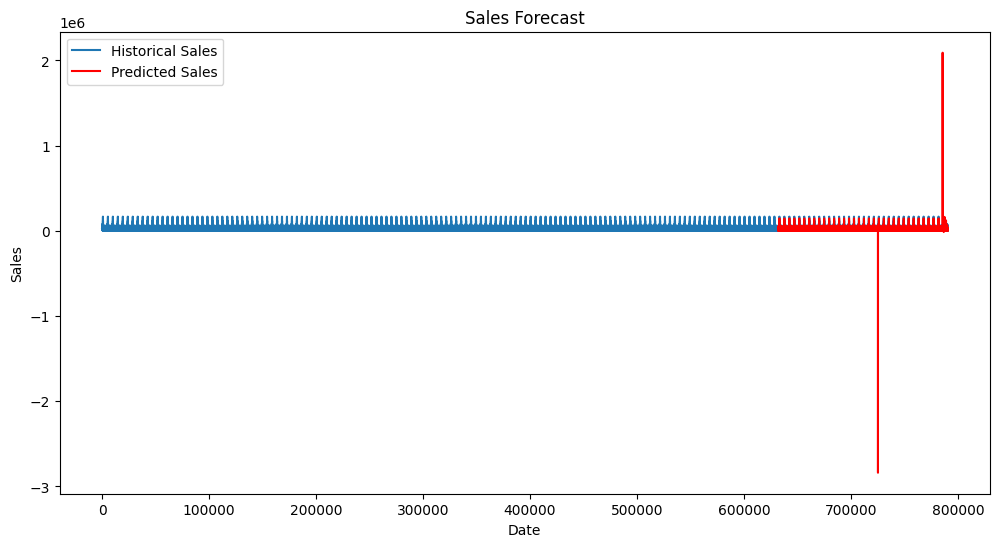

In [ ]:
import matplotlib.pyplot as plt

# Plot historical sales and predictions
plt.figure(figsize=(12, 6))
plt.plot(df_2.index, df_2['Weekly_Sales'], label='Historical Sales')
plt.plot(df_2.index[-len(y_test):], y_pred, label='Predicted Sales', color='red')
plt.legend()
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


# IMPACT OF EXTERNAL FACTORS

In [ ]:
pip install pandas matplotlib seaborn statsmodels


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


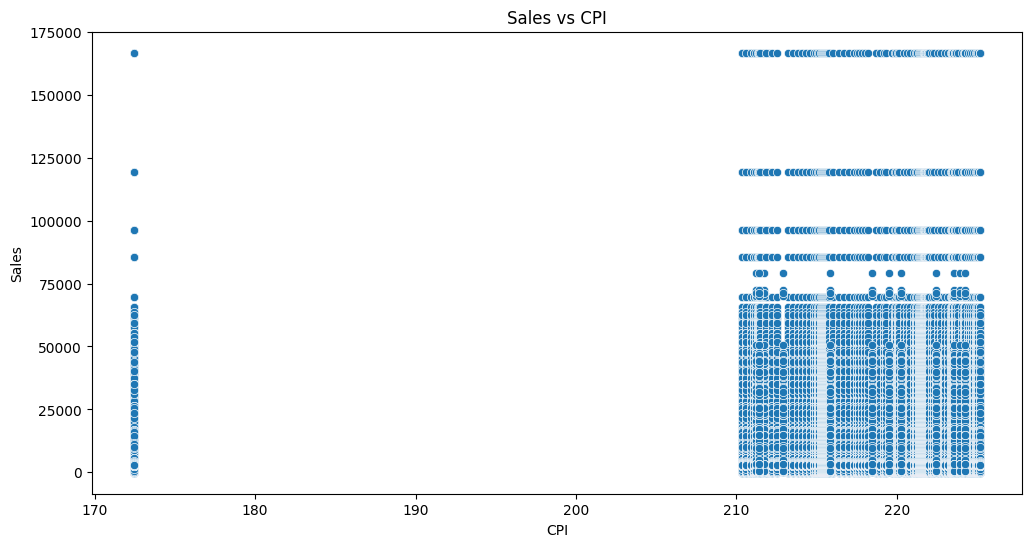

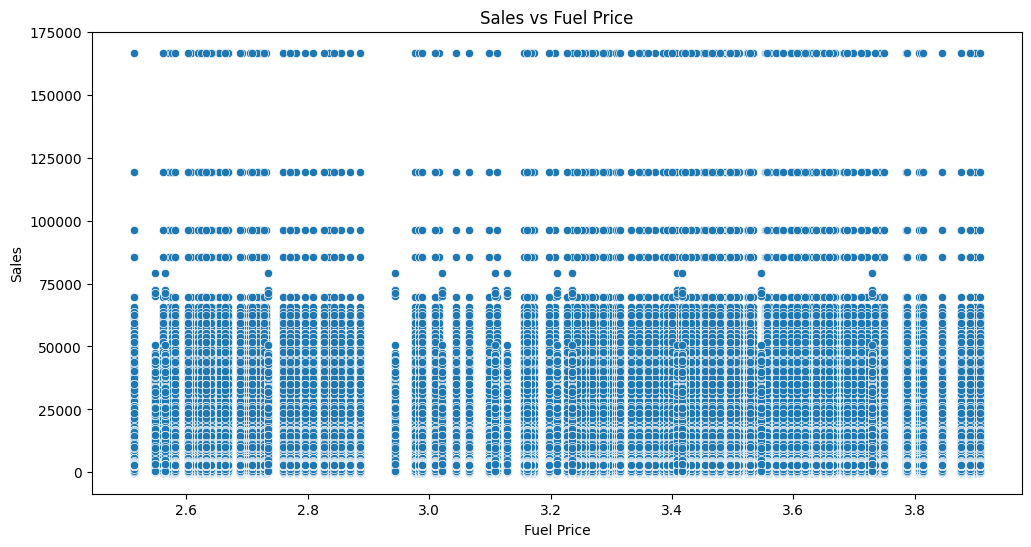

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Sales vs CPI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df_2) # Pass df_2 to the data parameter
plt.title('Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Fuel Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df_2) # Pass df_2 to the data parameter
plt.title('Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Sales')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


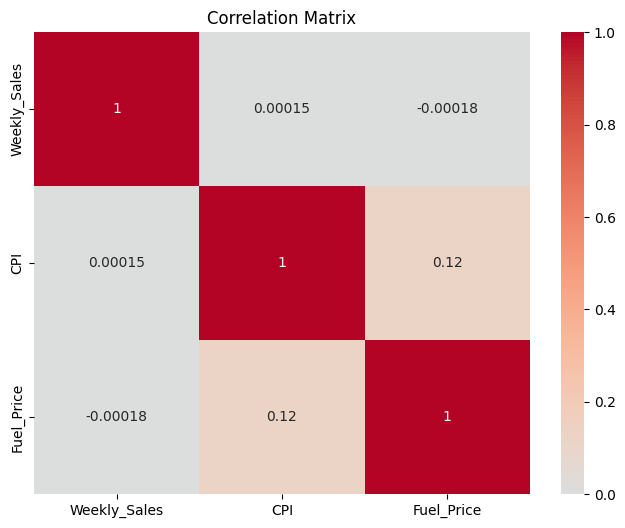

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_2[['Weekly_Sales', 'CPI', 'Fuel_Price']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


# **Real-World Application and Strategy Formulation**



In [ ]:
sales_df=pd.read_csv('/content/drive/MyDrive/sales data-set.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sales_df['Store'] = sales_df['Store'].astype('category')
sales_df['Dept'] = sales_df['Dept'].astype('string')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
sales_df.info()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  string        
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), string(1)
memory usage: 10.5 MB


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  string        
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), string(1)
memory usage: 10.5 MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Total number of stores:", sales_df.Store.nunique())
print("Total number of departments:", sales_df.Dept.nunique())

Total number of stores: 45
Total number of departments: 81


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sales_new=sales_df[(sales_df['Store'] == 10) & (sales_df['Dept'].isin(['1', '2', '3', '4','5' ]))].drop(columns=['IsHoliday'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sales_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 87524 to 88238
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         715 non-null    category      
 1   Dept          715 non-null    string        
 2   Date          715 non-null    datetime64[ns]
 3   Weekly_Sales  715 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1), string(1)
memory usage: 24.4 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sales_new.Date.min(), df_sales_new.Date.max()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
df_sales_new.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(715, 4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


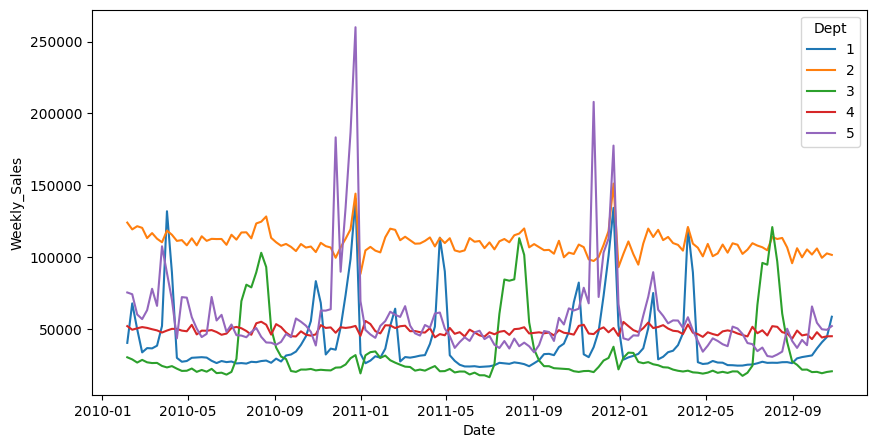

In [ ]:
df_sales_new['Date'] = pd.to_datetime(df_sales_new['Date'])
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sales_new, x='Date', y='Weekly_Sales',hue="Dept")
plt.show()

Conclusions based on the observations above-

1) Dept 1: Sales  increase in April, with another peak observed towards at the end of the year in November and December.

2) Dept 2: Sales is constant till september, then rises in december.

3) Dept 3: Sales remain stable, with a increases  in August and September, along with a minute rise in December and January.

4) Dept 4: Sales in this department is almost constant with very small fluctuations.

5) Dept 5: Sales for this product shows rise at the start of year and then increases significantly in december.

# **Exploratory Data Analysis(EDA)**

**Weekly Sales & Time**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

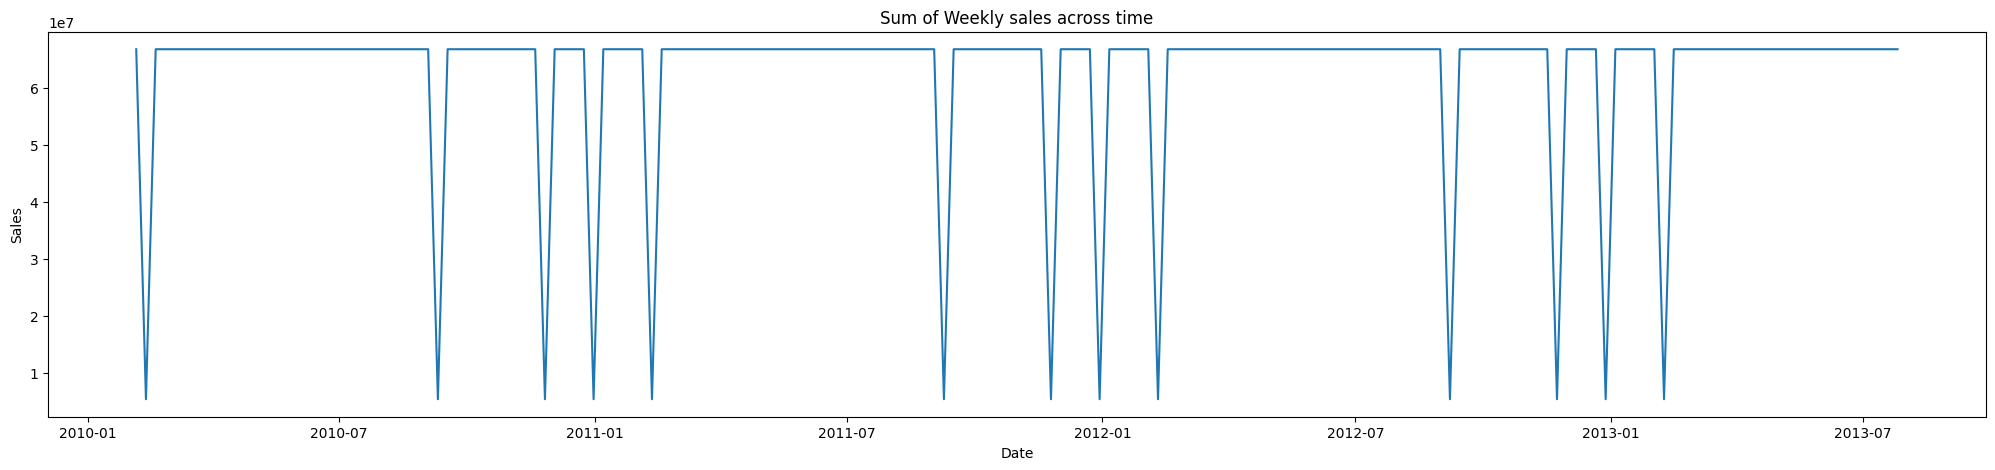

In [ ]:
sales_across_time = df_1.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (25,5))
plt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales)
plt.title("Sum of Weekly sales across time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show

**Weekly Sales year wise**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-98-6dd0500b79f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')


Text(0.5, 0, 'Years')

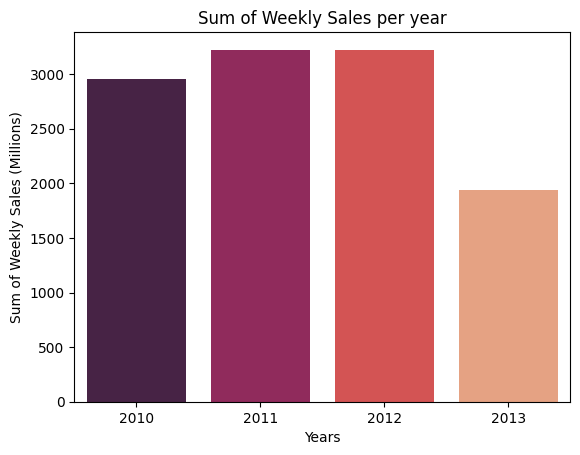

In [ ]:
yearly_sales = df_1.groupby(df_1.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')
plt.title("Sum of Weekly Sales per year")
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")

The above graph tell us about the total weekly sales yearwise.It will help the retail department to formulate the strategies for future based on the increase or decrease of the sales.

**Weekly Sales Monthwise**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-99-79d13246942b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')


Text(0.5, 1.0, 'Sum of weekly sales per month')

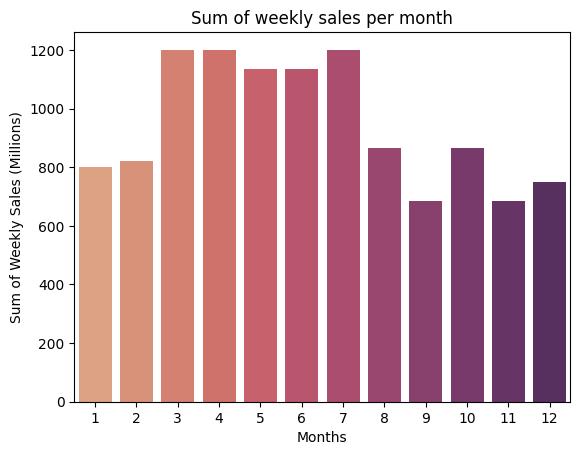

In [ ]:
monthly_sales = df_1.groupby(df_1.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')
plt.xlabel('Months')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Sum of weekly sales per month")

The above bar graph tells us the total sales in each month of the year.

**Unemployment Rate year wise**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

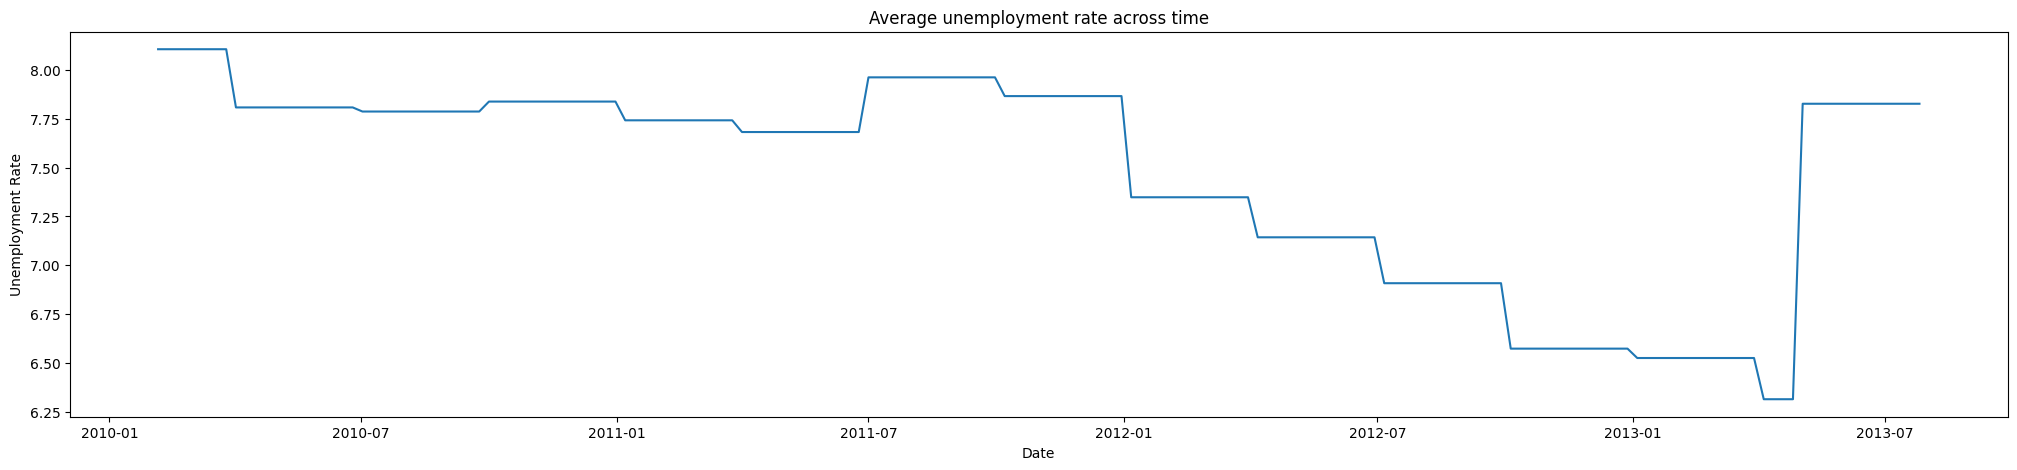

In [ ]:
unn_across_time = df_1.groupby(by = ['Date'], as_index= False)['Unemployment'].mean() # average rate of unemployment each date for all the different outlets
plt.figure(figsize = (25,5))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show

The above graph shows the variations in the  average unemployment rate across the time .

**Average CPI Yearwise**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Average CPI across time')

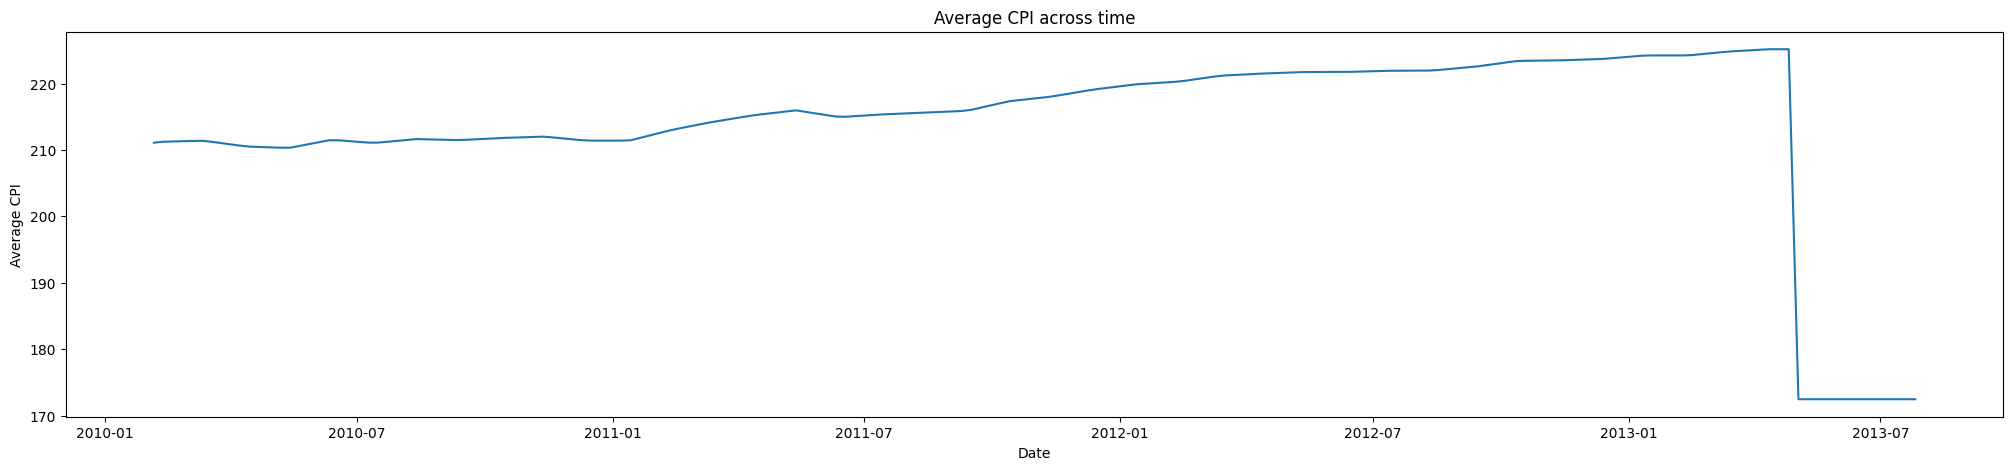

In [ ]:
cpi_across_time = df_1.groupby(by = ['Date'], as_index= False)['CPI'].mean()
plt.figure(figsize = (25,5))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI)
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")

This graph shows the variations in the CPI with time.

**Average Fuel price vs Time**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Average Fuel Price across time')

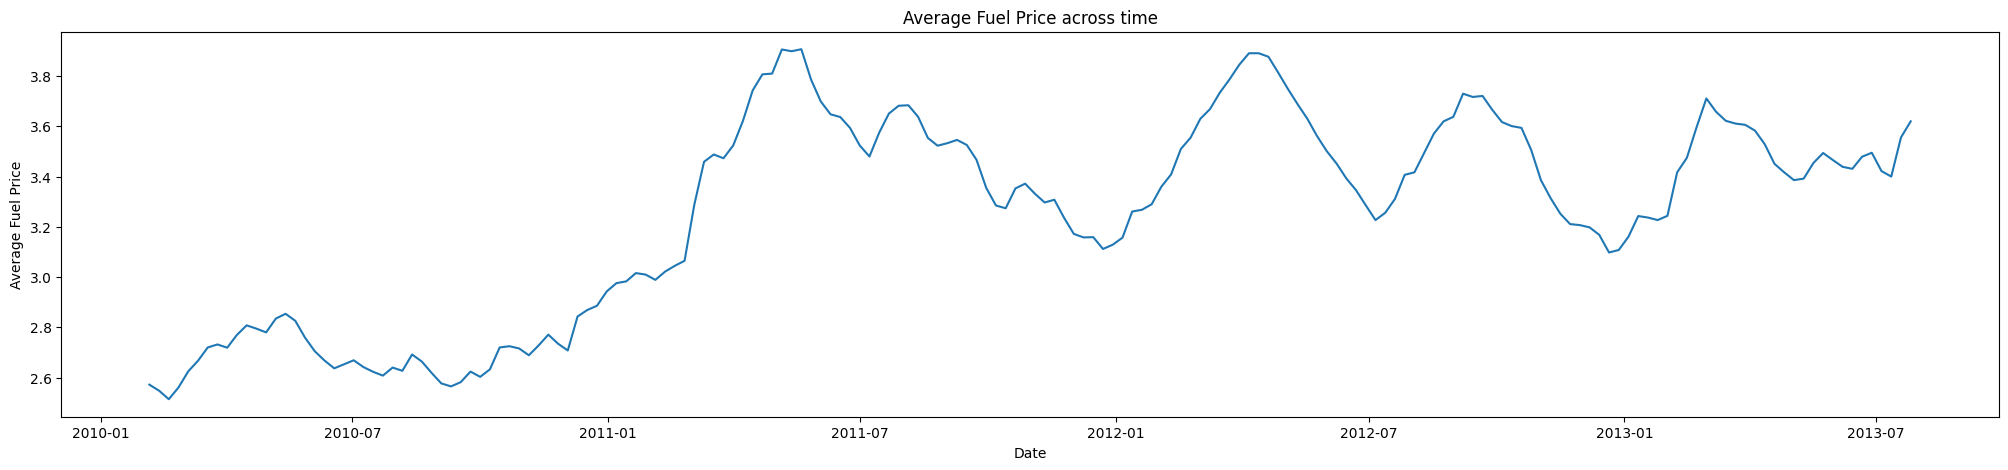

In [ ]:
fuel_across_time = df_1.groupby(by = ['Date'], as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(25,5))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price)
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")
# Average fuel price is generally increasing across the years

The above graph shows how the fuel price is varying  with time.

**Average temperature variation with time**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Average Temperature across time')

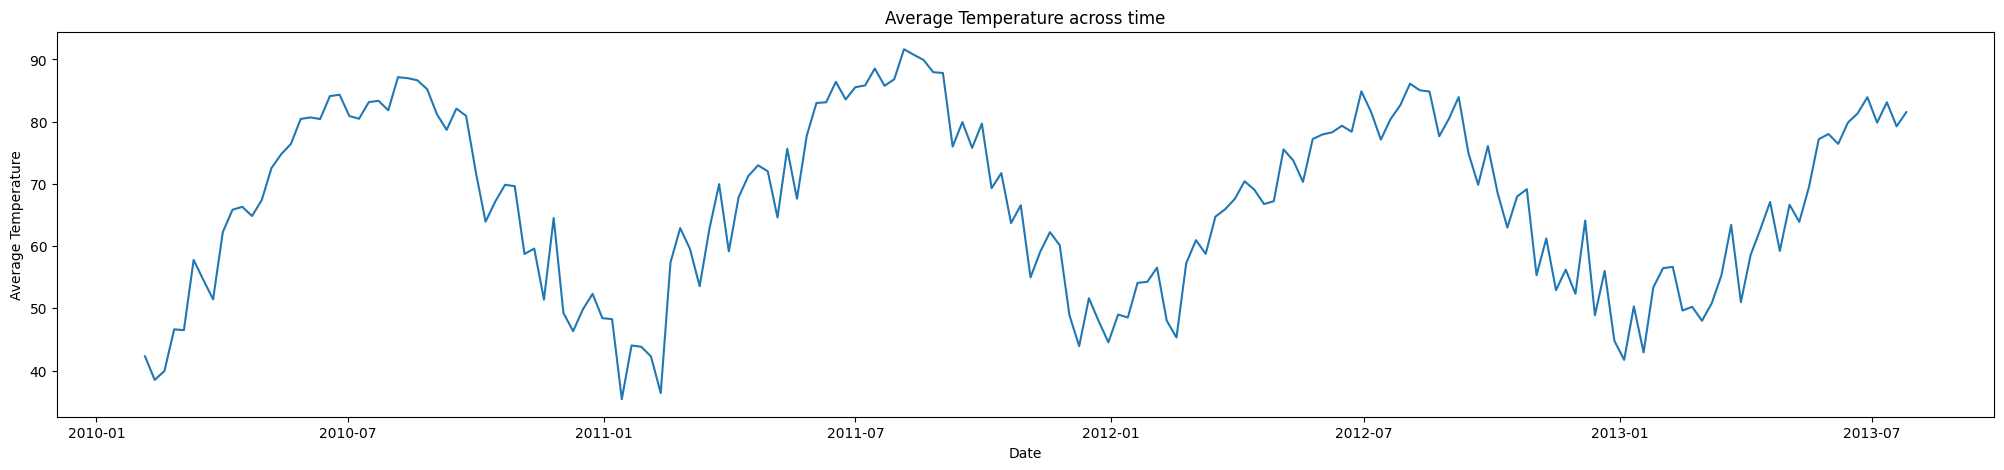

In [ ]:
temp_across_time = df_1.groupby(by = ['Date'], as_index= False)['Temperature'].mean()
plt.figure(figsize=(25,5))
plt.plot(temp_across_time.Date, temp_across_time.Temperature)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")
# Average fuel price is generally increasing across the years

The above graph displays the pattern of temperate variation with time.

**Average Weekly Sales yearwise**




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-105-e4be457a1938>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')


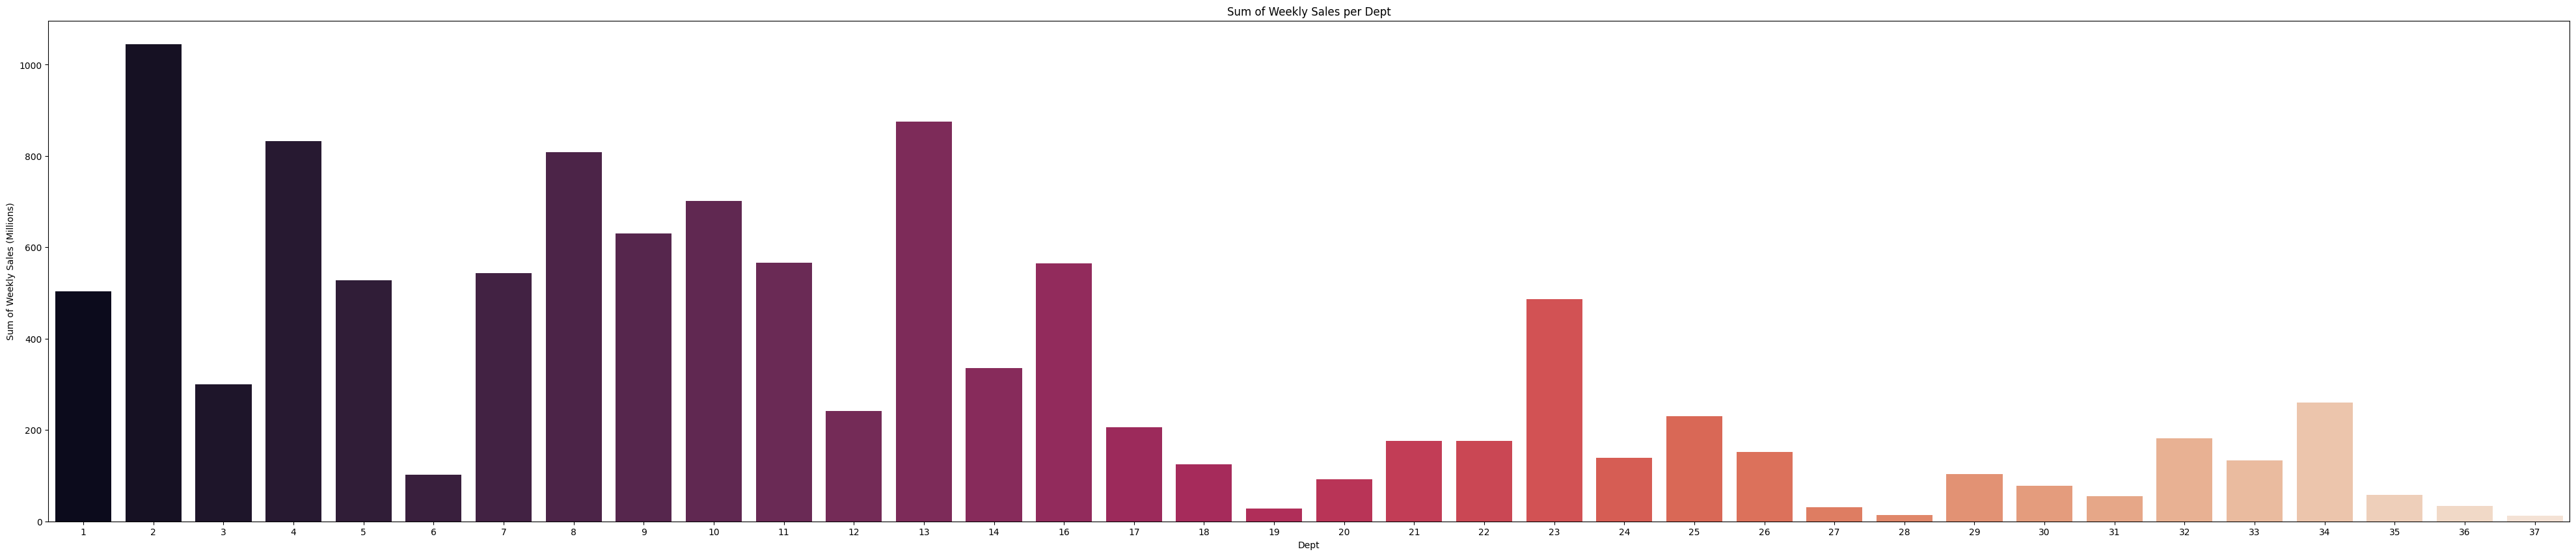

In [ ]:
dept_sales = df_1.groupby(by = ['Dept'], as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
plt.figure(figsize=(50,10))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Dept')
plt.show()


The above graph shows the average weekly sales yearwise.

# **Correlation**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


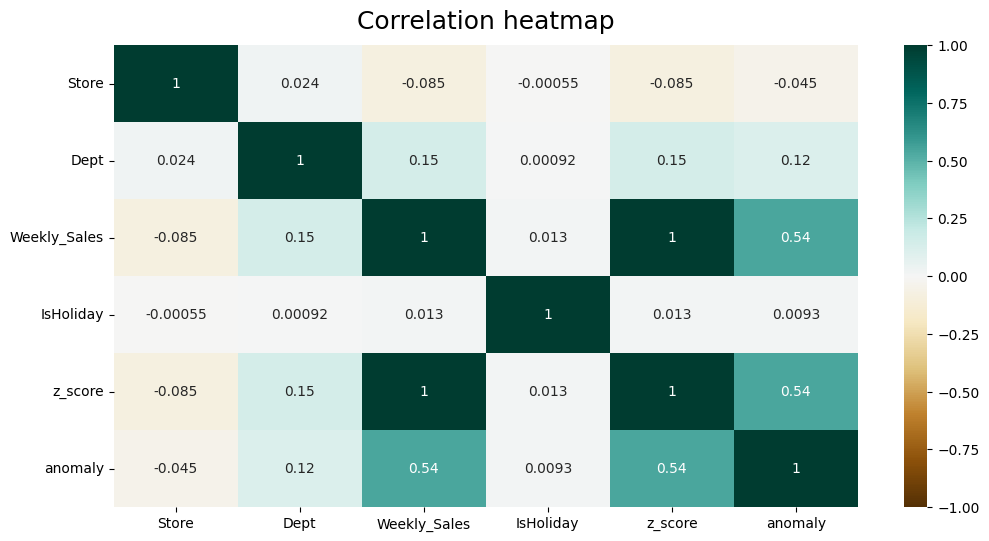

In [ ]:
plt.figure(figsize = (12,6))
df_1 = pd.DataFrame(df_1)
df_1 = df.astype(float, errors = 'ignore')
heatmap = sns.heatmap(df_1.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation heatmap', fontdict = {'fontsize':18}, pad=12);

The corrrelation heatmap shows the relationship between the featuers present in the dataset.Features having Correlation value 1 shows the strongest relationship with each other whereas the features having correlation value -1 shows the weekest relationship between them.

# **Conclusion**

This project is based on the application of Advanced Machine Learning.We have learnt how to handle anomalies in the dataset and how customer segmentation can help the enterprise in their sales growth.The concept of market basket analysis was also covered in this project along with the deamnd forecasting.We have also seen how the external factors affect the sales.